In [1]:
# datapath = '/home/common/data/oadat/OADAT.h5'
datapath = '/home/firat/docs/dlbirhoui/parsed_data2/OADAT.h5'

In [2]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import pyoat as pt

from ReconstructionBP import get_normal_signal
from reconstructions import ReconstructionBenchmarks

In [3]:
# f = '/home/anna/OptoAcoustics/MIDL/validation/NewLinearInput_sides_old_pipeline__2022-02-09/Reconstructions/Real_multi_signal_with_denoise/Real_multi_signal_with_denoise.h5'
# f = '/home/anna/data_19Nov2022/old_syn_train.h5'
f = 'MIAreview/Syn/Train//Reconstructions/old_syn_train_linear_sigmat_multisegment//old_syn_train_linear_sigmat_multisegment.h5'
# f = '/home/anna/dlbirhoui_data/arm.h5'
# f = '/home/anna/ResultsSignalDA/GT_syn/old_syn_train_multi_sigmat_multisegment.h5'
h5_fh = h5py.File(f, 'r')

In [4]:
# h5_fh['recon_linear']
h5_fh.keys()

<KeysViewHDF5 ['ElasticNet 1e-5']>

In [5]:
h5_fh['ElasticNet 1e-5']

<HDF5 dataset "ElasticNet 1e-5": shape (5400, 256, 256), type "<f4">

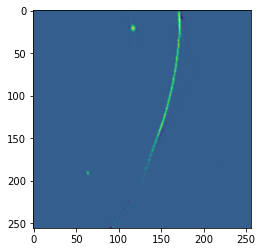

In [6]:
plt.imshow(h5_fh['ElasticNet 1e-5'][0])

In [5]:
Rec = ReconstructionBenchmarks(geometry='multi')

In [6]:
datasets = {'syn': 'SCD', 'real': 'SWFD_ms'}

In [7]:
h5_fh = h5py.File(datapath, 'r')

In [8]:
def get_example(ds):
    mode = datasets[ds]
    print(list(h5_fh[mode].keys()))
    i = np.random.choice(2000)
    raw_signal = h5_fh[mode]['ms_raw'][i]
    idx_use = list(range(524, 1480))
    signal = -get_normal_signal(raw_signal)[idx_use]
    reconstructed = Rec.reconstruction_BP(signal)

    fig, axs = plt.subplots(2, 2, figsize=(15,15))
    axs[0, 0].imshow(h5_fh[mode]['ms_BP'][i], cmap='gray')
    axs[0, 1].imshow(reconstructed, cmap='gray')
    axs[1, 0].imshow(raw_signal, cmap='gray')
    axs[1, 1].imshow(signal, cmap='gray')

In [9]:
list(h5_fh[datasets['real']].keys())

['linear_BP',
 'linear_raw',
 'ms_BP',
 'ms_raw',
 'patientID',
 'side',
 'skin_type',
 'sliceID']

In [10]:
save_mods = ['ms_raw', 'ground_truth', 'linear_BP', 'ms_BP', 'sliceID', 'patientID']

In [11]:
def get_dims(ds):
    mode = datasets[ds]
    for k in save_mods:
        if k in h5_fh[mode].keys():
            print(k, h5_fh[mode][k].shape)

In [12]:
get_dims('real')

ms_raw (39228, 2030, 256)
linear_BP (39228, 256, 256)
ms_BP (39228, 256, 256)
sliceID (39228,)
patientID (39228,)


In [13]:
get_dims('syn')

ms_raw (20000, 2030, 256)
ground_truth (20000, 256, 256)
linear_BP (20000, 256, 256)
ms_BP (20000, 256, 256)
sliceID (20000,)


['ground_truth', 'labels', 'linear_BP', 'linear_raw', 'ms_BP', 'ms_raw', 'sliceID', 'vc,lv128_BP', 'vc,lv128_raw', 'vc,ss128_BP', 'vc,ss128_raw', 'vc,ss32_BP', 'vc,ss32_raw', 'vc,ss64_BP', 'vc,ss64_raw', 'vc_BP', 'vc_raw']
BP: 0.36 sec


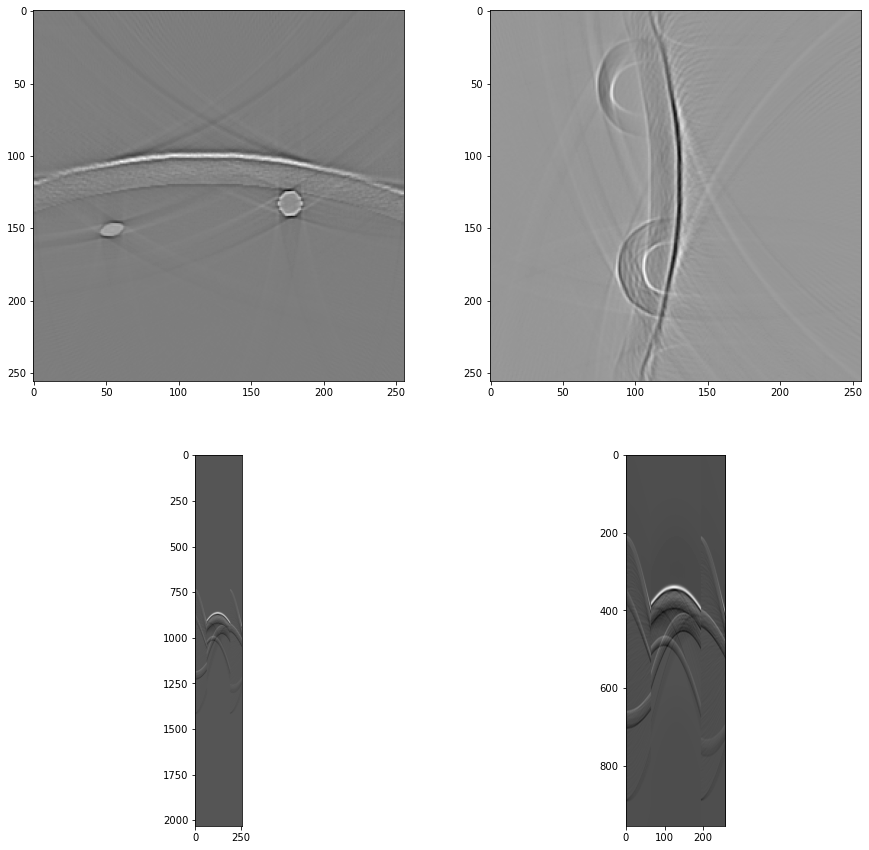

In [14]:
get_example('syn')

['linear_BP', 'linear_raw', 'ms_BP', 'ms_raw', 'patientID', 'side', 'skin_type', 'sliceID']
BP: 0.35 sec


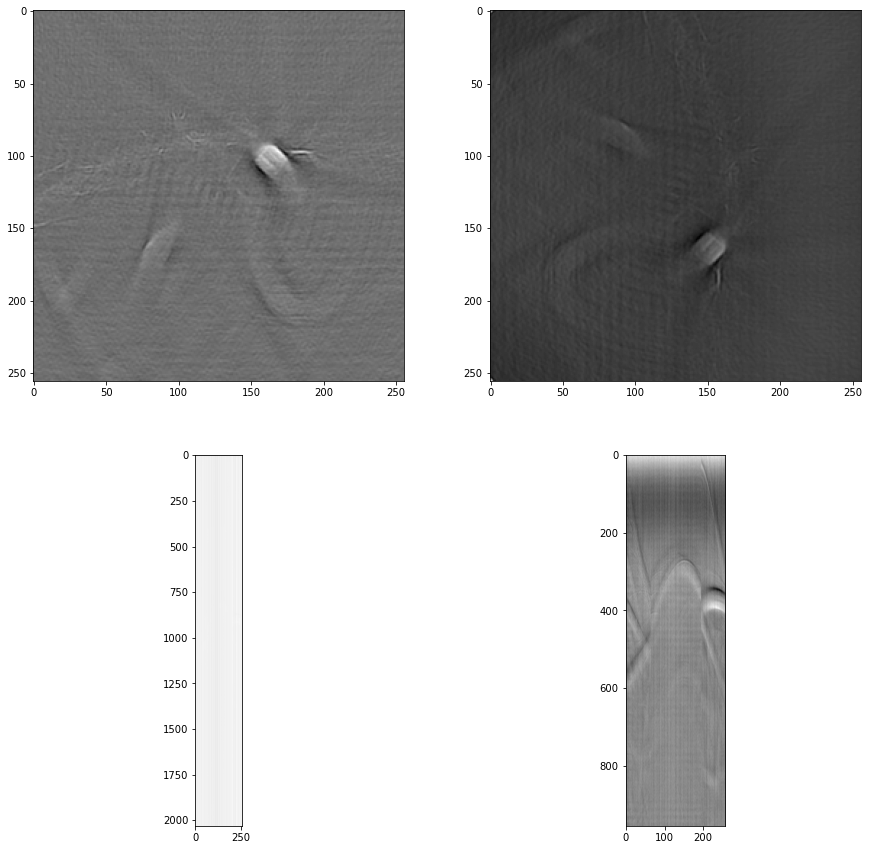

In [15]:
get_example('real')

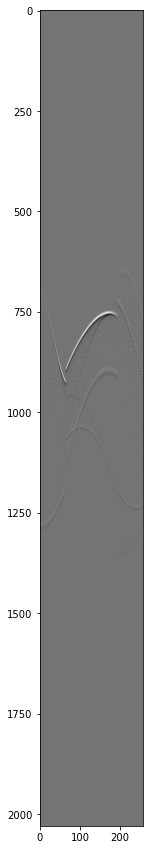

In [3]:
# filename_real_old = '/home/anna/dlbirhoui_data/arm.h5'
filename_real_old = '/home/anna/dlbirhoui_data/parsed_simulated_ellipsesSkinMask_mgt_ms_ring_256_ratio_09_1_20210412.h5'
# filename_real_old = './tmp.h5ad'
h5_fh_real_old = h5py.File(filename_real_old, 'r')
plt.figure(figsize=(15,15))
plt.imshow(h5_fh_real_old['sigmat_multisegment'][1], cmap='gray')

In [18]:
get_dims('syn')

ms_raw (20000, 2030, 256)
ground_truth (20000, 256, 256)
linear_BP (20000, 256, 256)
ms_BP (20000, 256, 256)
sliceID (20000,)


In [19]:
get_dims('real')

ms_raw (39228, 2030, 256)
linear_BP (39228, 256, 256)
ms_BP (39228, 256, 256)
sliceID (39228,)
patientID (39228,)


* "Out of the 14 volunteers in SWFD, we
use eight for training (IDs: 1, 2, 3, 4, 5, 6, 7, 8), 
one for validation (ID: 9) and five for testing (IDs:
10, 11, 12, 13, 14). 

* Out of the 20k slices in SCD, 
we use the first 14k for training, following 1k for
validation, and the last 5k for testing.”

In [20]:
file = h5_fh[datasets['real']]
split_real = {'train': [], 'test': [], 'val': []}
for i in range(file['patientID'].shape[0]):
    if file['patientID'][i] == 9:
        split_real['val'].append(i)
    if file['patientID'][i] >= 10:
        split_real['test'].append(i)
    else:
        split_real['train'].append(i)
# save_subset('./tmp.h5ad', file, [0, 1, 2], resolutionXY=256)

In [21]:
for k in split_real:
    print(k, len(split_real[k]))

train 25218
test 14010
val 2802


In [22]:
# print(list(range(10)))
idx = [i for i in range(10)]
idx[0]

0

In [23]:
file = h5_fh[datasets['syn']]
split_syn = {
            'train': [i for i in range(14000)], 
            'test': [i for i in range(14000, 15000)], 
            'val': [i for i in range(15000,20000)]}

In [24]:
for k in split_syn:
    print(k, len(split_syn[k]))

train 14000
test 1000
val 5000


In [27]:
from tqdm import tqdm

def save_subset(fname_h5, file, idx, resolutionXY=256):
    num_images = len(idx)
    imsize = [resolutionXY, resolutionXY]
    sigmat_size = [2030, 256]    
    compression_lvl = 9 # pick between 0 and 9
    
    print('creating file: %s' % fname_h5)

    data = {}
    with h5py.File(fname_h5, 'w', libver='latest') as h5_fh:
        data['sigmat_multisegment'] = h5_fh.create_dataset('sigmat_multisegment', shape=[num_images] + sigmat_size, 
            dtype=np.float32, chunks=tuple([1] + sigmat_size), compression='gzip', compression_opts=compression_lvl)
                
        data['recon_multisegment'] = h5_fh.create_dataset('recon_multisegment', shape=[num_images] + imsize, 
            dtype=np.float32, chunks=tuple([1] + imsize), compression='gzip', compression_opts=compression_lvl)
        
        data['recon_linear'] = h5_fh.create_dataset('recon_linear', shape=[num_images] + imsize, 
            dtype=np.float32, chunks=tuple([1] + imsize), compression='gzip', compression_opts=compression_lvl)
        
        data['img_num'] = h5_fh.create_dataset('img_num', shape=[num_images] + [1], 
            dtype=np.long, compression='gzip', compression_opts=compression_lvl)
        
        data['sliceID'] = h5_fh.create_dataset('sliceID', shape=[num_images] + [1], 
            dtype=np.long, compression='gzip', compression_opts=compression_lvl)
        
        data['patientID'] = h5_fh.create_dataset('patientID', shape=[num_images] + [1], 
            dtype=np.long, compression='gzip', compression_opts=compression_lvl)

    pbar = tqdm(range(num_images))
    for i_im in pbar:
        with h5py.File(fname_h5, 'a', libver='latest') as h5_fh:
            h5_fh['sigmat_multisegment'][i_im] = -get_normal_signal(file['ms_raw'][idx[i_im]])
            
            h5_fh['recon_multisegment'][i_im] = file['ms_BP'][idx[i_im]]
            h5_fh['recon_linear'][i_im] = file['linear_BP'][idx[i_im]]
            h5_fh['img_num'][i_im] = idx[i_im]
            h5_fh['sliceID'][i_im] = file['sliceID'][idx[i_im]]
            
            if 'patientID' in file.keys():
                h5_fh['patientID'][i_im] = file['patientID'][idx[i_im]]
            else:
                h5_fh['patientID'][i_im] = 0

In [186]:
folder = '../data_19Nov2022/'


n_samples = 10000

for split in ['train', 'test', 'val']:
    ds = 'real'
    file = h5_fh[datasets[ds]]
    save_subset(f'{folder}/test_{ds}_{split}.h5', file, np.random.choice(split_real[split], n_samples, replace=False), resolutionXY=256)
    
    ds = 'syn'
    file = h5_fh[datasets[ds]]
    save_subset(f'{folder}/test_{ds}_{split}.h5', file, np.random.choice(split_syn[split], n_samples, replace=False), resolutionXY=256)

<ipython-input-185-40b3e9150469>:23: DeprecationWarning: `np.long` is a deprecated alias for `np.compat.long`. To silence this warning, use `np.compat.long` by itself. In the likely event your code does not need to work on Python 2 you can use the builtin `int` for which `np.compat.long` is itself an alias. Doing this will not modify any behaviour and is safe. When replacing `np.long`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.long, compression='gzip', compression_opts=compression_lvl)
<ipython-input-185-40b3e9150469>:26: DeprecationWarning: `np.long` is a deprecated alias for `np.compat.long`. To silence this warning, use `np.compat.long` by itself. In the likely event your code does not need to work on Python 2 you can use th

creating file: ../data_19Nov2022//test_real_train.h5


  0%|          | 0/200 [00:00<?, ?it/s]

creating file: ../data_19Nov2022//test_syn_train.h5


  0%|          | 0/200 [00:00<?, ?it/s]

creating file: ../data_19Nov2022//test_real_test.h5


  0%|          | 0/200 [00:00<?, ?it/s]

creating file: ../data_19Nov2022//test_syn_test.h5


  0%|          | 0/200 [00:00<?, ?it/s]

creating file: ../data_19Nov2022//test_real_val.h5


  0%|          | 0/200 [00:00<?, ?it/s]

creating file: ../data_19Nov2022//test_syn_val.h5


100%|██████████| 200/200 [00:44<00:00,  4.52it/s]


In [1]:
folder = '../data_19Nov2022/'
ds = 'real'
file = h5_fh[datasets[ds]]

for split in ['train', 'test', 'val']:
    save_subset(f'{folder}/{ds}_{split}.h5', file, split_real[split], resolutionXY=256)

NameError: name 'h5_fh' is not defined

In [26]:
folder = '../data_19Nov2022/'
ds = 'syn'
file = h5_fh[datasets[ds]]

for split in ['train', 'test', 'val']:
    save_subset(f'{folder}/{ds}_{split}.h5', file, split_syn[split], resolutionXY=256)

<ipython-input-25-40b3e9150469>:23: DeprecationWarning: `np.long` is a deprecated alias for `np.compat.long`. To silence this warning, use `np.compat.long` by itself. In the likely event your code does not need to work on Python 2 you can use the builtin `int` for which `np.compat.long` is itself an alias. Doing this will not modify any behaviour and is safe. When replacing `np.long`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.long, compression='gzip', compression_opts=compression_lvl)
<ipython-input-25-40b3e9150469>:26: DeprecationWarning: `np.long` is a deprecated alias for `np.compat.long`. To silence this warning, use `np.compat.long` by itself. In the likely event your code does not need to work on Python 2 you can use the 

creating file: ../data_19Nov2022//syn_train.h5


  0%|          | 1/1000 [00:00<03:00,  5.52it/s]

creating file: ../data_19Nov2022//syn_test.h5


  0%|          | 1/5000 [00:00<15:09,  5.49it/s]

creating file: ../data_19Nov2022//syn_val.h5


100%|██████████| 5000/5000 [16:09<00:00,  5.16it/s]


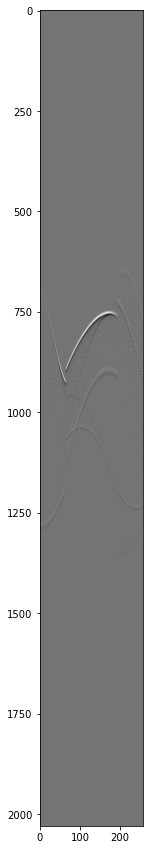

In [14]:
filename_real_old = '/home/anna/dlbirhoui_data/parsed_simulated_ellipsesSkinMask_mgt_ms_ring_256_ratio_09_1_20210412.h5'
# filename_real_old = './tmp.h5ad'
h5_fh_real_old = h5py.File(filename_real_old, 'r')
plt.figure(figsize=(15,15))
plt.imshow(h5_fh_real_old['sigmat_multisegment'][1], cmap='gray')

In [18]:
split_syn = {
            'train': [i for i in range(5400)], 
            'test': [i for i in range(5400, 5450)], 
            'val': [i for i in range(5450,5500)]}

In [20]:
from tqdm import tqdm

def save_subset_old(fname_h5, file, idx, resolutionXY=256):
    num_images = len(idx)
    imsize = [resolutionXY, resolutionXY]
    sigmat_size = [2030, 256]    
    compression_lvl = 9 # pick between 0 and 9
    
    print('creating file: %s' % fname_h5)

    data = {}
    with h5py.File(fname_h5, 'w', libver='latest') as h5_fh:
        data['sigmat_multisegment'] = h5_fh.create_dataset('sigmat_multisegment', shape=[num_images] + sigmat_size, 
            dtype=np.float32, chunks=tuple([1] + sigmat_size), compression='gzip', compression_opts=compression_lvl)
                
        data['recon_multisegment'] = h5_fh.create_dataset('recon_multisegment', shape=[num_images] + imsize, 
            dtype=np.float32, chunks=tuple([1] + imsize), compression='gzip', compression_opts=compression_lvl)
        
        data['recon_linear'] = h5_fh.create_dataset('recon_linear', shape=[num_images] + imsize, 
            dtype=np.float32, chunks=tuple([1] + imsize), compression='gzip', compression_opts=compression_lvl)
        
        data['img_num'] = h5_fh.create_dataset('img_num', shape=[num_images] + [1], 
            dtype=np.long, compression='gzip', compression_opts=compression_lvl)
        
        data['sliceID'] = h5_fh.create_dataset('sliceID', shape=[num_images] + [1], 
            dtype=np.long, compression='gzip', compression_opts=compression_lvl)
        
        data['patientID'] = h5_fh.create_dataset('patientID', shape=[num_images] + [1], 
            dtype=np.long, compression='gzip', compression_opts=compression_lvl)

    pbar = tqdm(range(num_images))
    for i_im in pbar:
        with h5py.File(fname_h5, 'a', libver='latest') as h5_fh:
            h5_fh['sigmat_multisegment'][i_im] = -get_normal_signal(file['sigmat_multisegment'][idx[i_im]])
            
            h5_fh['recon_multisegment'][i_im] = file['recon_multisegment'][idx[i_im]]
            h5_fh['recon_linear'][i_im] = file['recon_linear'][idx[i_im]]
            h5_fh['img_num'][i_im] = idx[i_im]
            h5_fh['sliceID'][i_im] = 0
            
            if 'patientID' in file.keys():
                h5_fh['patientID'][i_im] = file['patientID'][idx[i_im]]
            else:
                h5_fh['patientID'][i_im] = 0

In [22]:
folder = '../data_19Nov2022/'
ds = 'syn'

for split in ['train', 'test', 'val']:
    save_subset_old(f'{folder}/old_{ds}_{split}.h5', h5_fh_real_old, split_syn[split], resolutionXY=256)

<ipython-input-20-a71673af69a5>:23: DeprecationWarning: `np.long` is a deprecated alias for `np.compat.long`. To silence this warning, use `np.compat.long` by itself. In the likely event your code does not need to work on Python 2 you can use the builtin `int` for which `np.compat.long` is itself an alias. Doing this will not modify any behaviour and is safe. When replacing `np.long`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.long, compression='gzip', compression_opts=compression_lvl)
<ipython-input-20-a71673af69a5>:26: DeprecationWarning: `np.long` is a deprecated alias for `np.compat.long`. To silence this warning, use `np.compat.long` by itself. In the likely event your code does not need to work on Python 2 you can use the 

creating file: ../data_19Nov2022//old_syn_train.h5


  0%|          | 0/50 [00:00<?, ?it/s]

creating file: ../data_19Nov2022//old_syn_test.h5


  0%|          | 0/50 [00:00<?, ?it/s]

creating file: ../data_19Nov2022//old_syn_val.h5


100%|██████████| 50/50 [01:22<00:00,  1.66s/it]


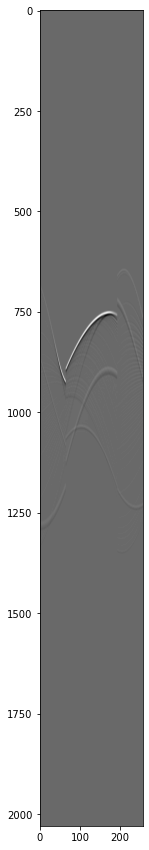

In [13]:
filename_real_old = './tmp.h5'
h5_fh_real_old = h5py.File(filename_real_old, 'r')
plt.figure(figsize=(15,15))
plt.imshow(h5_fh_real_old['sigmat_multisegment'][1], cmap='gray')